# Model Comparisons ("Ablation" Study)

In [5]:
import numpy as np
from helper_inference import test_evaluation
from helper_metrics import compute_metrics, compute_confusion_matrix, threshold_plot
from helpers_submission import load_data
from experiments import ensemble_logistic_regression_experiment, reg_logistic_regression_experiment

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
np.random.seed(42) # Global Seed - same as in Tuning for reproducibility
DATA_PATH = r"../ML_course/projects/project1/data/new_dataset/"

### Baseline Model
Raw Data, no resampling, no polynomials, no regularization. no nothing

c:\Users\lucas\OneDrive\Dokumente\16_Repository\PROJECTS\ML1_REPO\ml-project-1-magical\helpers.py:506: RuntimeWarning: divide by zero encountered in log
  log_x_tr = np.log(X_train+1)
c:\Users\lucas\OneDrive\Dokumente\16_Repository\PROJECTS\ML1_REPO\ml-project-1-magical\helpers.py:507: RuntimeWarning: divide by zero encountered in log
  log_x_te= np.log(X_test+1)


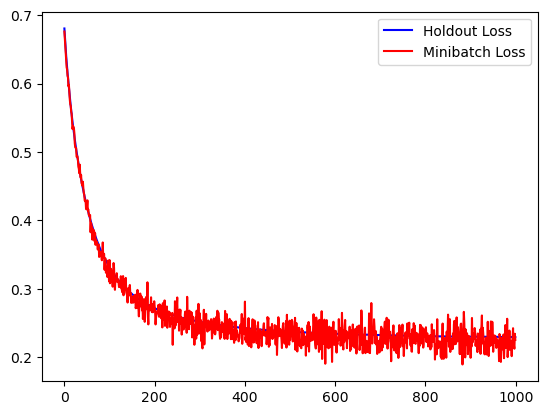

Min of Losses: 0.22935186492580753, Max of Losses: 0.680450198604759, Number of Nas in Losses: 0
                           Test Accuracy: 0.91555
                          train Accuracy: 0.91591
                                 Test F1: 0.17259
                                Train F1: 0.17269


In [29]:
path = "train_raw.npy"
params = [0, 0, 1000, 0.05, 1028, True, False, 1, (0, 0), 0.5]
X_train, X_test, y_train, y_test = load_data(DATA_PATH, path)

test_evaluation(X_train, y_train, X_test, y_test, reg_logistic_regression_experiment, params, conf_mat=False)

### Model 2
Better data (data_train_full), no resampling, no polynomials, no regularization

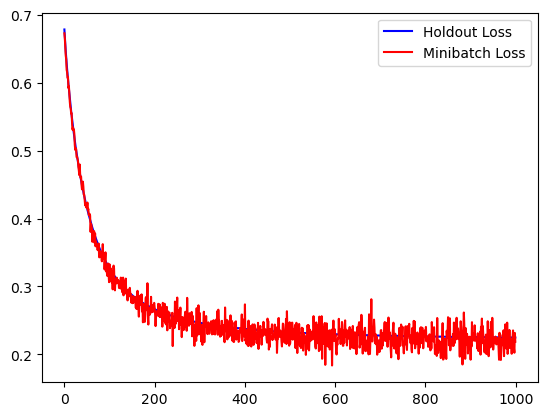

Min of Losses: 0.22485972220225983, Max of Losses: 0.6783380965856098, Number of Nas in Losses: 0
                           Test Accuracy: 0.91488
                          train Accuracy: 0.91607
                                 Test F1: 0.21874
                                Train F1: 0.22417


In [20]:
path = "train_data_full.npy"
params = [0, 0, 1000, 0.05, 1028, True, False, 1, (0, 0), 0.5]
X_train, X_test, y_train, y_test = load_data(DATA_PATH, path)

test_evaluation(X_train, y_train, X_test, y_test, reg_logistic_regression_experiment, params, conf_mat=False)

### Model 3
all of the above + adding data augmentation (log and polynomial)

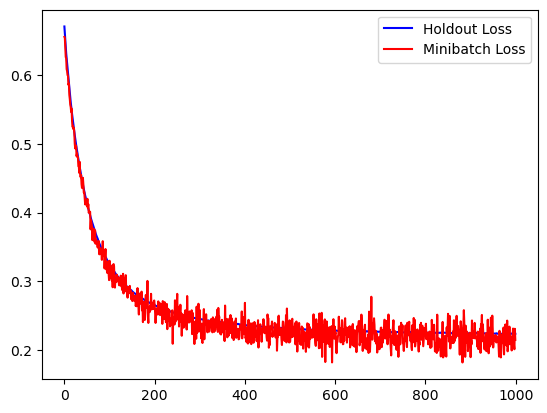

Min of Losses: 0.22354511588757575, Max of Losses: 0.6705268514293192, Number of Nas in Losses: 0
                           Test Accuracy: 0.91513
                          train Accuracy: 0.91618
                                 Test F1: 0.23866
                                Train F1: 0.24208


In [21]:
path = "train_data_full.npy"
params = [0, 0, 1000, 0.05, 1028, True, True, 2, (0, 0), 0.5]
X_train, X_test, y_train, y_test = load_data(DATA_PATH, path)

test_evaluation(X_train, y_train, X_test, y_test, reg_logistic_regression_experiment, params, conf_mat=False)

### Model 4
all of the above plus adding regularization

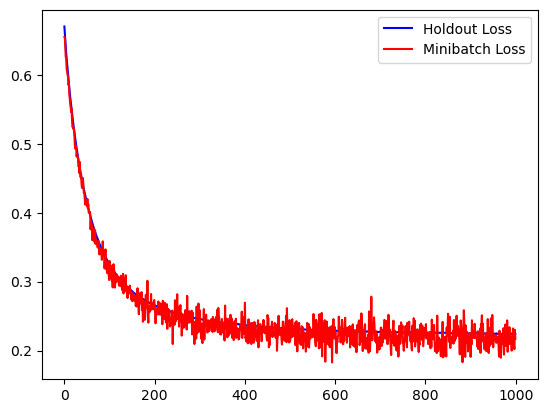

Min of Losses: 0.2239344283542222, Max of Losses: 0.6705268514293192, Number of Nas in Losses: 0
                           Test Accuracy: 0.91513
                          train Accuracy: 0.91613
                                 Test F1: 0.23045
                                Train F1: 0.23305


In [22]:
path = "train_data_full.npy"
params = [0.05, 0.5, 1000, 0.05, 1028, True, True, 2, (0, 0), 0.5]
X_train, X_test, y_train, y_test = load_data(DATA_PATH, path)

test_evaluation(X_train, y_train, X_test, y_test, reg_logistic_regression_experiment, params, conf_mat=False)

### Model 5
all of the above plus adding resampling, i.e. our final best individual model

In [28]:
path = "train_data_full.npy"
params = [0.05, 0.5, 1000, 0.05, 1028, False, True, 2, (3, 2), 0.5]
X_train, X_test, y_train, y_test = load_data(DATA_PATH, path)

test_evaluation(X_train, y_train, X_test, y_test, reg_logistic_regression_experiment, params, conf_mat=False)

                           Test Accuracy: 0.88035
                          train Accuracy: 0.81643
                                 Test F1: 0.43429
                                Train F1: 0.58467


### Model 6: Ensemble
Best final model (Model 5), with ensembling

[0.05, 0.5, 1000, 0.05, 1028, False, True, 2, (3, 2)]
[0.05, 0.5, 1000, 0.05, 1028, False, True, 2, (3, 2)]
[0.05, 0.5, 1000, 0.05, 1028, False, True, 2, (3, 2)]
[0.05, 0.5, 1000, 0.05, 1028, False, True, 2, (3, 2)]
[0.05, 0.5, 1000, 0.05, 1028, False, True, 2, (3, 2)]
[0.05, 0.5, 1000, 0.05, 1028, False, True, 2, (3, 2)]
[0.05, 0.5, 1000, 0.05, 1028, False, True, 2, (3, 2)]
[0.05, 0.5, 1000, 0.05, 1028, False, True, 2, (3, 2)]
[0.05, 0.5, 1000, 0.05, 1028, False, True, 2, (3, 2)]
[0.05, 0.5, 1000, 0.05, 1028, False, True, 2, (3, 2)]
Averaging
F1_Test: 0.4369723851767063
[[ 3054  5084]
 [ 2786 54703]]


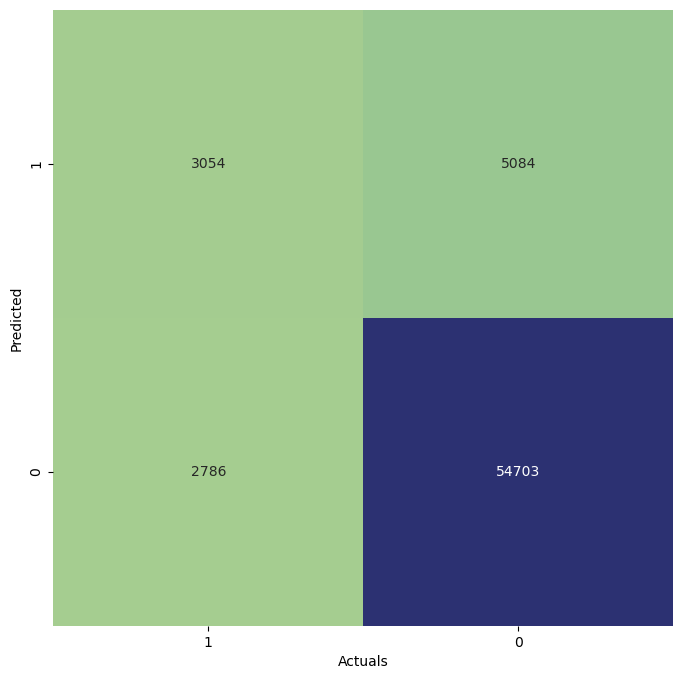

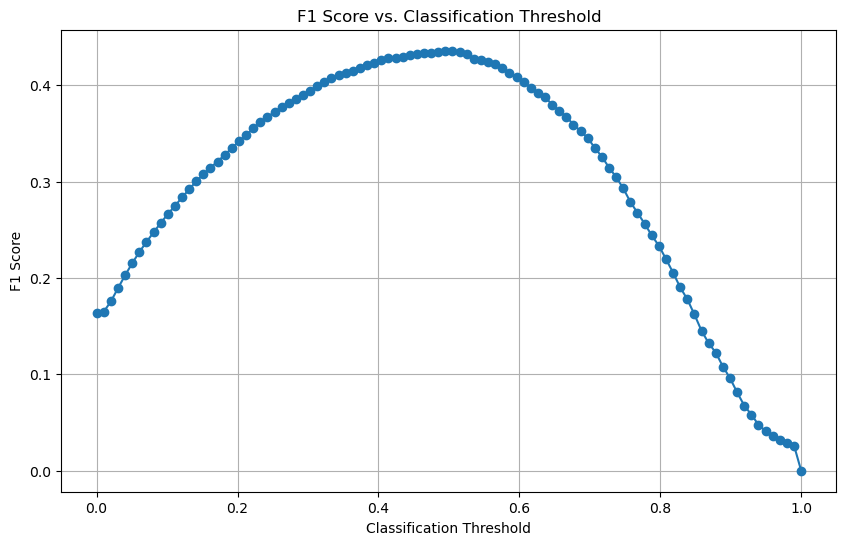

In [24]:
## best params, 10 times but with bootrapping the data
path = "train_data_full.npy"
params = [0.05, 0.5, 1000, 0.05, 1028, False, True, 2, (3, 2)] # 3,2 is best
X_train, X_test, y_train, y_test = load_data(DATA_PATH, path) # 43.55 to beat with bootstrapping 0.8, 0.4 slightly better even (0.4369), 0.4 is the best
threshold = 0.5
ensemble_params = [params]*10  # 10 times the best model

avg_pred_te, ensemble_opt_w, avg_loss_tr, avg_loss_te, _, ensemble_pred_te, median_votes = ensemble_logistic_regression_experiment(y_train, y_test, X_train, X_test, ensemble_params, row_subsample=0.4, col_subsample=1)

random_y = np.zeros(y_train.shape)
print("Averaging")
acc_te, acc_tr, f1_te, f1_tr = compute_metrics(y_test, ensemble_pred_te, y_train, random_y, threshold)
print("F1_Test: {}".format(f1_te))

compute_confusion_matrix(y_test, ensemble_pred_te, threshold)
threshold_plot(ensemble_pred_te, y_test)